In [300]:
%load_ext autoreload
%autoreload 2

In [301]:
from behav import plotting, utils, loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns

/home/AD/tsainbur/anaconda3/envs/cdcp_paper/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  """


In [302]:
from cdcp.experiment_info import subjects
from cdcp.paths import DATA_PATH_MAGPI, DATA_DIR
from cdcp.behavior.data import prepare_behavior_data
from cdcp.visualization.colors import colors
subjects, DATA_PATH_MAGPI

(('B1174',
  'B1426',
  'B1170',
  'B1432',
  'B1437',
  'B1433',
  'B1597',
  'B1427',
  'B1188',
  'B1244'),
 PosixPath('/mnt/cube/RawData/Magpi'))

In [303]:
# pickled dataframes
stim_df = pd.read_pickle(DATA_DIR / 'stim_df.pickle')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection


In [270]:

def plot_cube(cube_definition, ax, zorder, facecolor = (0,0,1,0.1), linewidths=1):
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]
    edgecolors = list(np.array(facecolor[:3])*0.25) + [1.0]
    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]

    faces = Poly3DCollection(edges, linewidths=linewidths, edgecolors=edgecolors)#, zorder=-zorder)
    faces.set_facecolor(facecolor)

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter(points[:,0], points[:,1], points[:,2], s=0)

    



encoder: 
   input: [32, 128, 128, 1]
   conv: [32, 64, 64, 64]
   conv: [32, 32, 32, 128]
   conv: [32, 16, 16, 256]
   conv: [32, 8, 8, 512]
   conv: [32, 4, 4, 1024]
   fully connected: [32, 1024]
   Z: [32, 16]
decoder: 
   z: [32, 16]
   fully connected: [32, 1024]
   fully connected: [32, 16384]
   	reshape: [32, 4, 4, 1024]
   	upsample: [32, 8, 8, 1024]
   conv: [32, 8, 8, 1024]
   	upsample: [32, 16, 16, 1024]
   conv: [32, 16, 16, 512]
   	upsample: [32, 32, 32, 512]
   conv: [32, 32, 32, 256]
   	upsample: [32, 64, 64, 256]
   conv: [32, 64, 64, 128]
   	upsample: [32, 128, 128, 128]
   conv: [32, 128, 128, 64]
   X: [32, 128, 128, 1]

In [271]:
import seaborn as sns

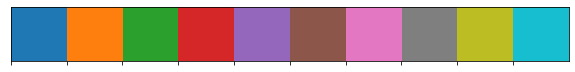

In [272]:
pal = sns.color_palette('tab10')
sns.palplot(pal)

In [318]:
alpha = 0.25
encoder_color, z_color, decoder_color = sns.color_palette('tab10', 3)
#encoder_color, z_color, decoder_color = [[0,0,0], [0,0,0], [0,0,0]]
encoder_color = list(encoder_color) + [alpha]
z_color = list(z_color) + [0.75]
decoder_color = list(decoder_color) + [alpha]

In [319]:
network_shapes = [
    [128, 128, 1, encoder_color],
    [64, 64, 64,encoder_color],
    [32, 32, 128,encoder_color],
    [16, 16, 256,encoder_color],
    [8, 8, 512,encoder_color],
    [4, 4, 1024,encoder_color],
    [1, 1, 1024,encoder_color],
    #[1, 1, 16,z_color],
    [1, 1, 128,z_color],
    
     [1, 1, 1024,decoder_color],
     [4, 4, 1024,decoder_color],
     [8, 8, 512,decoder_color],
     [16, 16, 256,decoder_color],
     [32, 32, 128,decoder_color],
     [64, 64, 64,decoder_color],
     [128, 128, 1,decoder_color]
]


In [320]:
#%matplotlib notebook
%matplotlib inline

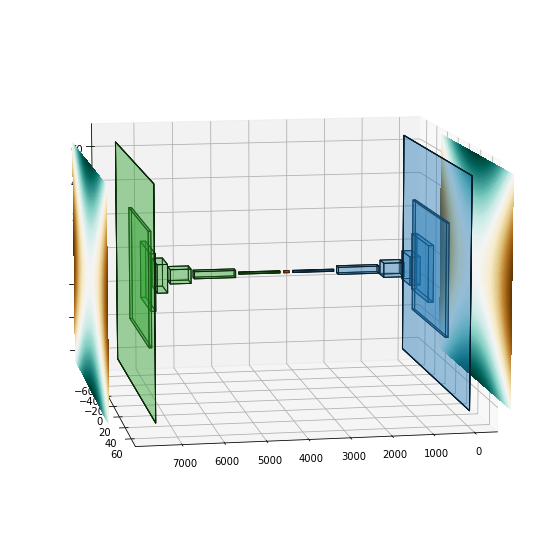

In [321]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

cur_x = 0
spacing = 100
for elementi, (n_y, n_z, n_x, layer_color) in enumerate(network_shapes): 
    
    (n_y, n_z, n_x) = np.array([n_y, n_z, n_x])**1#.9
    cube_definition = [
        (cur_x,-(n_y/2),-(n_z/2)), (cur_x,n_y-(n_y/2),-(n_z/2)), (n_x + cur_x,-(n_y/2),-(n_z/2)), (cur_x,-(n_y/2),n_z-(n_z/2))
    ]
    plot_cube(cube_definition, ax, facecolor=layer_color, zorder=elementi)

    cur_x += n_x + spacing

# create a 21 x 21 vertex mesh
xx, yy = np.meshgrid(np.linspace(-64,64,128), np.linspace(-64,64,128))

# create vertices for a rotated mesh (3D rotation matrix)
X =  xx 
Y =  yy
Z =  10*np.ones(X.shape)

# create some dummy data (20 x 20) for the image
data = np.cos(xx/128) * np.cos(xx/128) + np.sin(yy/128) * np.sin(yy/128)
cset = ax.contourf(data, X, Y, 128, zdir='x', offset=-1000, cmap=plt.cm.BrBG)
cset = ax.contourf(data, X, Y, 128, zdir='x', offset=cur_x+1000, cmap=plt.cm.BrBG)
#ax.axis('off')
ax.view_init(elev=10., azim=80)

In [322]:
from mpl_toolkits.mplot3d import Axes3D


In [323]:
data1 = stim_df.loc['A'].x.reshape((128,128))
data2 = stim_df.loc['E'].x.reshape((128,128))

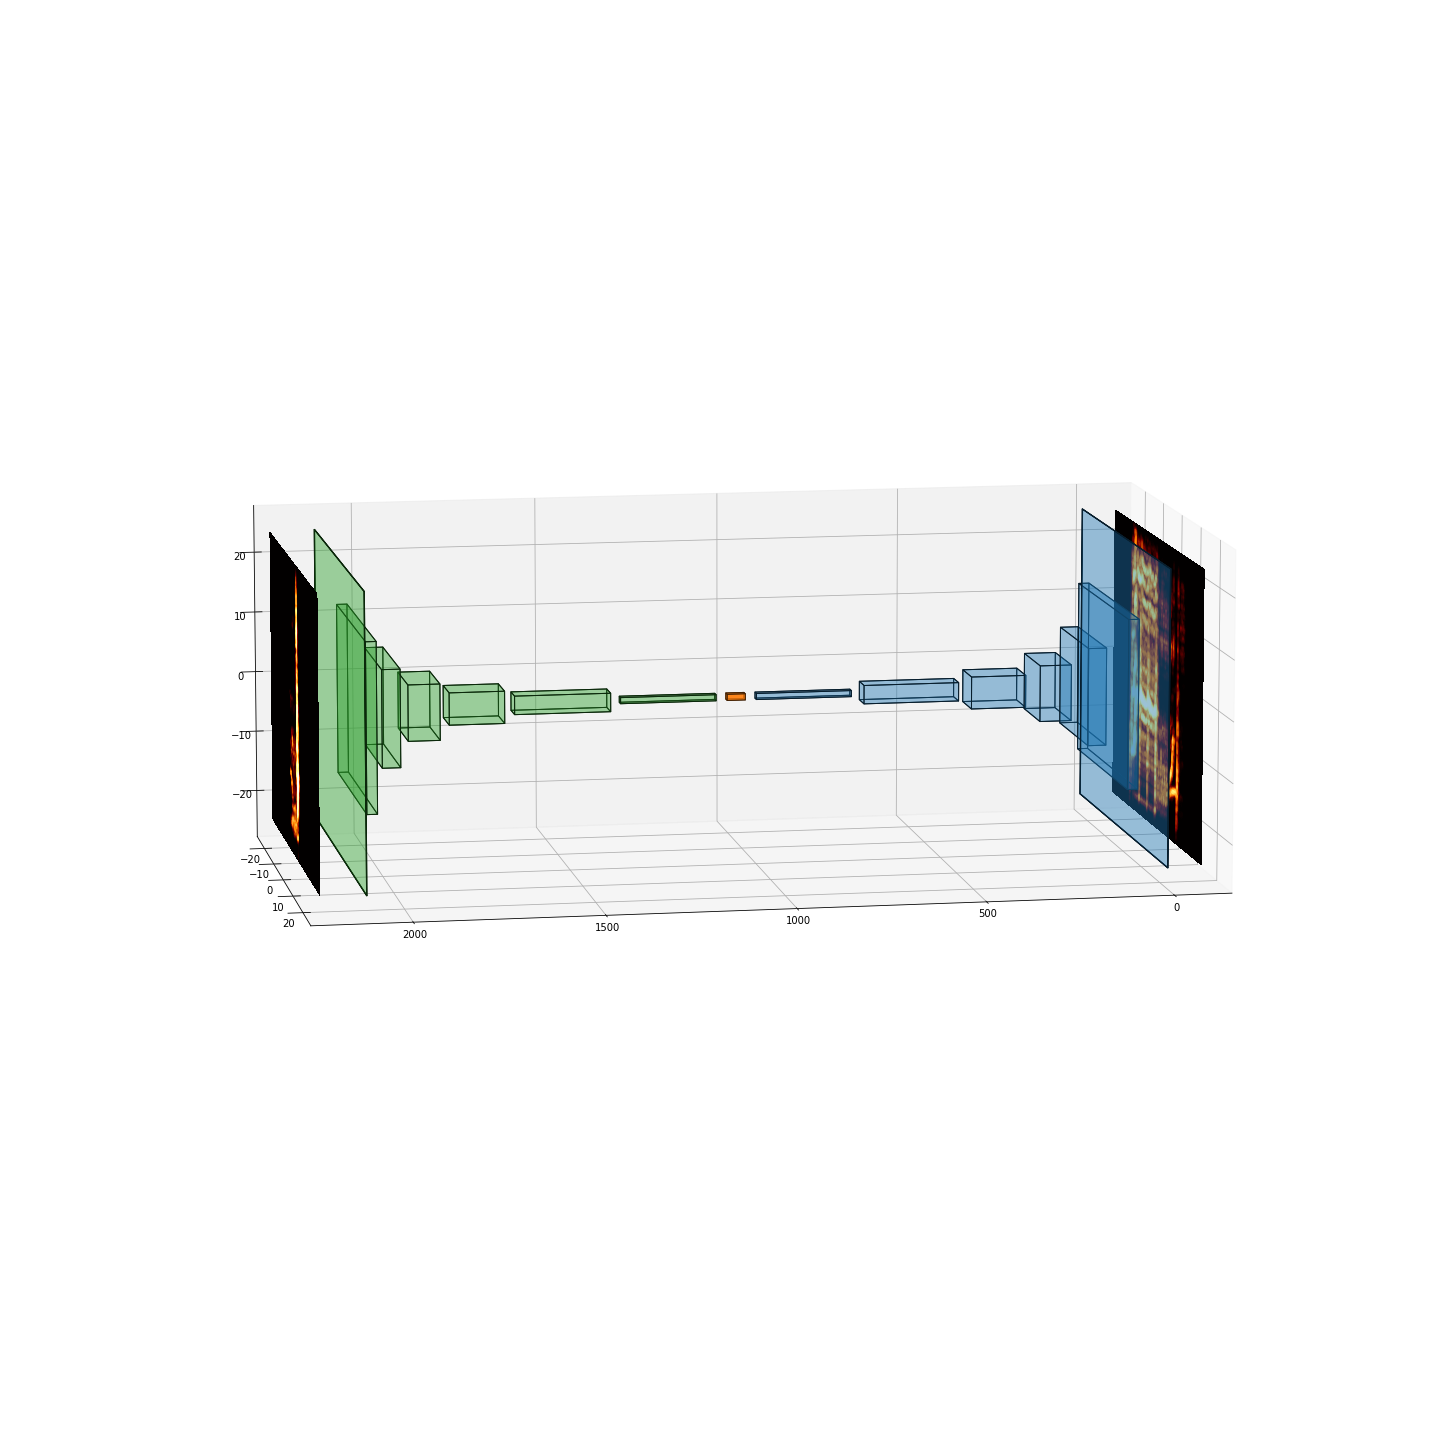

In [327]:
fig = plt.figure(figsize=(30,20))
ax = fig.gca(projection='3d')

cur_x = 0
spacing = 30
for elementi, (n_y, n_z, n_x, layer_color) in enumerate(network_shapes): 
    
    (n_y, n_z, n_x) = np.array([n_y, n_z, n_x])**0.8#.9
    cube_definition = [
        (cur_x,-(n_y/2),-(n_z/2)), (cur_x,n_y-(n_y/2),-(n_z/2)), (n_x + cur_x,-(n_y/2),-(n_z/2)), (cur_x,-(n_y/2),n_z-(n_z/2))
    ]
    plot_cube(cube_definition, ax, facecolor=layer_color, zorder=elementi)

    cur_x += n_x + spacing

# create a 21 x 21 vertex mesh
size = 128**0.8
xx, yy = np.meshgrid(np.linspace(-int(size/2),int(size/2),128), np.linspace(-int(size/2),int(size/2),128))

# create vertices for a rotated mesh (3D rotation matrix)
X =  xx 
Y =  yy
Z =  10*np.ones(X.shape)

# create some dummy data (20 x 20) for the image

cset = ax.contourf(data1, X, Y, 128, zdir='x', offset=-spacing*3, cmap=plt.cm.afmhot)
cset = ax.contourf(data2, X, Y, 128, zdir='x', offset=cur_x+spacing*3, cmap=plt.cm.afmhot)

#ax.axis('off')
#ax.view_init(elev=10., azim=80)
ax.view_init(elev=10., azim=80)

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 0.5, 0.5, 1]))
plt.tight_layout()